In [18]:
# import tools
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [20]:
# import data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [21]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

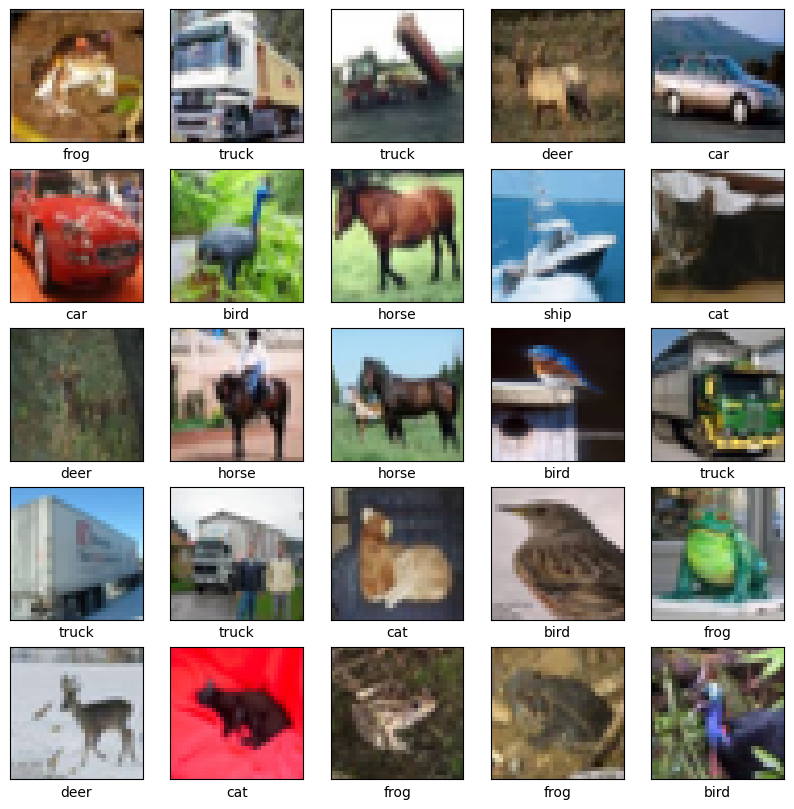

In [22]:
# Data verification
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [23]:
# Create the convolutional base
#instantiate the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

2024-02-23 14:37:04.438833: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
# display the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [25]:
# add flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [29]:
# compile and train model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [30]:
# Fitting the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 162s 103ms/step - loss: 1.5207 - accuracy: 0.4443 - val_loss: 1.2841 - val_accuracy: 0.5418
Epoch 2/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.1681 - accuracy: 0.5873 - val_loss: 1.0640 - val_accuracy: 0.6318
Epoch 3/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9961 - accuracy: 0.6487 - val_loss: 0.9583 - val_accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 165s 106ms/step - loss: 0.8975 - accuracy: 0.6860 - val_loss: 0.9099 - val_accuracy: 0.6874
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.8203 - accuracy: 0.7122 - val_loss: 0.9103 - val_accuracy: 0.6870
Epoch 6/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.7566 - accuracy: 0.7354 - val_loss: 0.8716 - val_accuracy: 0.6982
Epoch 7/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7098 - accuracy: 0.7507 - val_lo

313/313 - 1s - loss: 0.8502 - accuracy: 0.7142 - 1s/epoch - 3ms/step


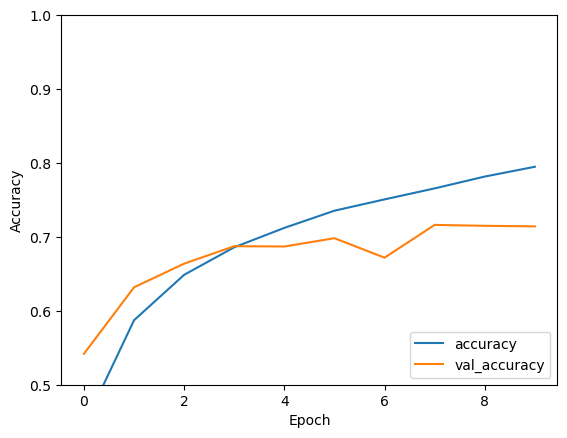

In [31]:
# Evaluate the model
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [32]:
print(test_acc)

0.7142000198364258
